# This is a notebook for Albright et al. in prep.

## Supplementary figure -- Eddy Moisture Transport

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmaps as gvcmaps
import geocat.viz.util as gvutil
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

### Eddy Moisture Transport

In [22]:
# read in eddy covariance
path = "/glade/work/malbright/final_nam_manuscript_files/eddy_moisture_transport"
covtot_plio = xr.open_dataset(f"{path}/pliocene/covtot_plio.nc") * 1000
covtot_pi = xr.open_dataset(f"{path}/preindustrial/covtot_pi.nc") * 1000

covuq_plio = xr.open_dataset(f"{path}/pliocene/covuq_plio.nc")
covuq_pi = xr.open_dataset(f"{path}/preindustrial/covuq_pi.nc")

covvq_plio = xr.open_dataset(f"{path}/pliocene/covvq_plio.nc")
covvq_pi = xr.open_dataset(f"{path}/preindustrial/covvq_pi.nc")

# read in topo info
pi_path = "/glade/work/malbright/final_nam_manuscript_files/climatology_files/preindustrial/high_res"
remap_path = "/glade/derecho/scratch/malbright/FROM_CHEYENNE/remap"
plio_topo = xr.open_dataset(
    f"{remap_path}/b.e13.B1850C5CN.ne120_g16.pliohiRes.002.cam.h0.PHIS.005901-006005.remap.nc"
).isel(time=0)
pi_topo = xr.open_dataset(
    f"{pi_path}/b.e13.B1850C5CN.ne120_g16.tuning.005.cam.h0.ELEVATION.nc"
).elevation

plio_topo = plio_topo.PHIS / 9.8
# pi_topo = pi_topo.PHIS / 9.8

covtot_diff = covtot_plio - covtot_pi

In [23]:
# Read in grid information
lat_uv = covuq_plio["lat"]
lon_uv = covuq_plio["lon"]

In [24]:
covtot_diff_smooth = mpcalc.smooth_n_point(covtot_diff.output_var_name, 9, 2)

In [25]:
covtot_diff_smooth_xr = xr.DataArray(
    covtot_diff_smooth.values,
    coords={"lat": covtot_diff.lat.values, "lon": covtot_diff.lon.values},
    dims=["lat", "lon"],
)

In [29]:
covtot_plio.output_var_name.values.max()

361.31223

In [31]:
covtot_plio.output_var_name.values.mean()

66.90425

## Panel:

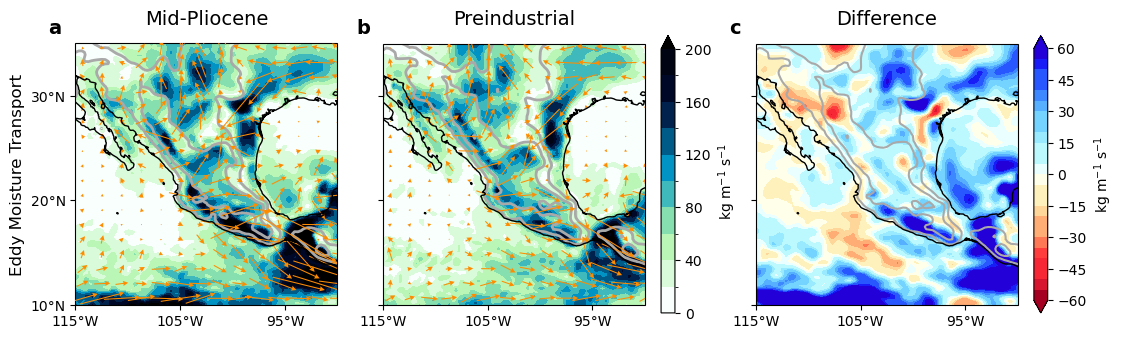

In [58]:
# Specify projection for maps
proj = ccrs.PlateCarree()

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(13, 4))
grid = fig.add_gridspec(
    ncols=3, nrows=1, width_ratios=[0.85, 1.061, 1.061], wspace=0.15, hspace=0.05
)

###############################
# TOP PANEL
###############################

# Create axis for Plio Eddy Moisture Transport
ax1 = fig.add_subplot(grid[0, 0], projection=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE, zorder=4)

# Create axis for PI Eddy Moisture Transport
ax2 = fig.add_subplot(grid[0, 1], projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE, zorder=4)

# Create axis for difference plot 

## NOTE: MIGHT TAKE THIS OUT !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

ax4 = fig.add_subplot(grid[0, 2], projection=ccrs.PlateCarree())
ax4.add_feature(cfeature.COASTLINE, zorder=4)

###############################
# FORMAT SUBPLOTS
###############################

# Format ticks and ticklabels for the map axes
for ax in [ax1, ax2, ax4]:
    gvutil.set_axes_limits_and_ticks(
        ax,
        xlim=(-115, -90),
        ylim=(10, 35),
        xticks=np.linspace(-130, -90, 13),
        yticks=np.linspace(15, 50, 7),
    )

ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())

ax2.xaxis.set_major_formatter(LongitudeFormatter())
ax2.yaxis.set_tick_params(labelleft=False)

ax4.xaxis.set_major_formatter(LongitudeFormatter())
ax4.yaxis.set_tick_params(labelleft=False)

###################################################
# EDDY MOISTURE TRANSPORT PLOTS
###################################################

# Pliocene

# Draw vector plot
Q = ax1.quiver(
    lon_uv[::6],  # longitude values for u and v
    lat_uv[::6],  # latitude values for u and v
    covuq_plio.output_var_name[::6, ::6],  # u values
    covvq_plio.output_var_name[::6, ::6],  # v values
    color="darkorange",
    pivot="middle",
    width=0.004,
    headwidth=5,
    scale=1,
    zorder=3,
)

# Define levels for contour map
levels = np.arange(500, 2550, 1000)

kwargs = dict(
    levels=levels,
    xticks=np.arange(-115, -90, 10),  # nice x ticks
    yticks=np.arange(10, 35, 10),  # nice y ticks
    add_colorbar=False,  # allow for colorbar specification later
    transform=ccrs.PlateCarree(),  # ds projection
)


plio_topo.plot.contour(
    ax=ax1,
    colors="darkgray",
    # colors="darkorange",
    # alpha=0.8,
    alpha=1.0,
    linewidths=2,
    linestyles="solid",
    add_labels=False,
    levels=levels,
    transform=ccrs.PlateCarree(),
)

# Define levels for contour map
levels_c = np.arange(0, 201, 20)

kwargs_c = dict(
    levels=levels_c,
    xticks=np.arange(-115, -90, 10),  # nice x ticks
    yticks=np.arange(10, 35, 10),  # nice y ticks
    add_colorbar=False,  # allow for colorbar specification later
    transform=ccrs.PlateCarree(),  # ds projection
)

# eddy_cmap = gvcmaps.WhiteBlue
# eddy_cmap = "GnBu"
eddy_cmap = gvcmaps.GMT_ocean_r
# eddy_cmap = gvcmaps.cmocean_deep

cf = covtot_plio.output_var_name.plot.contourf(
    ax=ax1, cmap=eddy_cmap, **kwargs_c
)

gvutil.set_titles_and_labels(
    ax1, xlabel="", ylabel="Eddy Moisture Transport", labelfontsize=12
)

ax1.set_title("Mid-Pliocene", fontsize=14, loc="center", y=1.04)

# Preindustrial

# Draw vector plot
Q = ax2.quiver(
    lon_uv[::6],  # longitude values for u and v
    lat_uv[::6],  # latitude values for u and v
    covuq_pi.output_var_name[::6, ::6],  # u values
    covvq_pi.output_var_name[::6, ::6],  # v values
    # color="black",
    color="darkorange",
    # color="orange",
    pivot="middle",
    width=0.004,
    headwidth=5,
    scale=1,
    zorder=3,
)

pi_topo.plot.contour(
    ax=ax2,
    colors="darkgray",
    # alpha=0.8,
    alpha=1.0,
    linewidths=2,
    linestyles="solid",
    add_labels=False,
    levels=levels,
    transform=ccrs.PlateCarree(),
)

cf = covtot_pi.output_var_name.plot.contourf(
    ax=ax2, cmap=eddy_cmap, **kwargs_c
)

gvutil.set_titles_and_labels(ax2, xlabel="", ylabel="")

cbar_eddy = fig.colorbar(cf, shrink=0.9, label=r'kg m$^{-1}$ s$^{-1}$')

ax2.set_title("Preindustrial", fontsize=14, loc="center", y=1.04)

# Difference

pi_topo.plot.contour(
    ax=ax4,
    colors="darkgray",
    alpha=1.0,
    linewidths=1.5,
    linestyles="solid",
    add_labels=False,
    levels=levels,
    transform=ccrs.PlateCarree(),
)

# Define levels for contour map
levels_c = np.arange(-60, 61, 5)
norm = mcolors.TwoSlopeNorm(vmin=-60, vcenter=0, vmax=60)

kwargs_c = dict(
    levels=levels_c,
    xticks=np.arange(-115, -90, 10),  # nice x ticks
    yticks=np.arange(10, 35, 10),  # nice y ticks
    add_colorbar=False,  # allow for colorbar specification later
    transform=ccrs.PlateCarree(),  # ds projection
    norm=norm,
)

cf = covtot_diff_smooth_xr.plot.contourf(
    # ax=ax4, cmap=gvcmaps.BlueRed_r, **kwargs_c
    ax=ax4, cmap=gvcmaps.BlueDarkRed18_r, **kwargs_c
)

cbar_eddy_diff = fig.colorbar(cf, shrink=0.9, label=r'kg m$^{-1}$ s$^{-1}$')
# cbar_eddy_diff.set_ticks(ticks=np.arange(-0.06, 0.07, 0.02))

ax4.set_title("Difference", fontsize=14, loc="center", y=1.04)

gvutil.set_titles_and_labels(ax4, xlabel="", ylabel="")


text_kwargs = dict(ha="center", va="center", fontsize=14, fontweight="bold")
plt.text(-182, 36.5, 'a', **text_kwargs)
plt.text(-152.5, 36.5, 'b', **text_kwargs)
plt.text(-117, 36.5, 'c', **text_kwargs)
# Show the plot
# plt.show()
plt.savefig("figures/eddy_moist_transport.pdf", dpi=300, bbox_inches="tight")